<a href="https://colab.research.google.com/github/SumayyaShaji/project1/blob/main/Copy_of_project_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
#Data Viz Pkg
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import numpy as np # linear algebbra
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv("covid-19.csv", encoding='utf-8')
df.head(3)

,source,headlines,description
0,ABC,Where Australia's first international tourists...,"Visitors from New Zealand, Singapore, South Ko..."
1,UPI,China hasn't reported COVID-19 death in year w...,"""This year, it's been an absolute nightmare,"" ..."
2,The Japan Times,"Glimmers of hope, but Doomsday Clock stuck at ...",... remains at 100 seconds to midnight this ye...


In [ ]:
df.shape

(1034, 3)

In [ ]:
df = df.drop_duplicates('headlines')
df.shape


(941, 3)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 941 entries, 0 to 1033
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source       940 non-null    object
 1   headlines    940 non-null    object
 2   description  940 non-null    object
dtypes: object(3)
memory usage: 29.4+ KB


In [ ]:
df.describe()


,source,headlines,description
count,940,940,940
unique,164,940,918
top,Times of India,Where Australia's first international tourists...,Trending Topics · Top Stories Right Now · Foll...
freq,95,1,7


In [ ]:
df.isnull().mean()


source         0.001063
headlines      0.001063
description    0.001063
dtype: float64

In [ ]:
df.head()

,source,headlines,description
0,ABC,Where Australia's first international tourists...,"Visitors from New Zealand, Singapore, South Ko..."
1,UPI,China hasn't reported COVID-19 death in year w...,"""This year, it's been an absolute nightmare,"" ..."
2,The Japan Times,"Glimmers of hope, but Doomsday Clock stuck at ...",... remains at 100 seconds to midnight this ye...
3,Devex,COVID-19 in 2021 — a timeline of the coronavir...,"And for earlier news, visit the timeline for 2..."
4,Firstpost,Explained: All you wanted to know ski jumping ...,Explained: All you wanted to know ski jumping ...


In [ ]:
df.columns

Index(['source', 'headlines', 'description'], dtype='object')

In [ ]:
df.dtypes


source         object
headlines      object
description    object
dtype: object

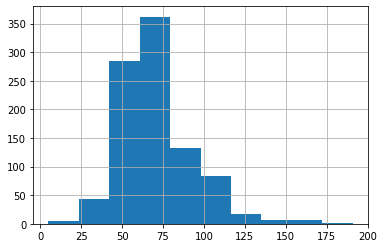

In [ ]:
df['headlines'].str.len().hist()


In [ ]:
df['source'].unique()

array(['ABC', 'UPI', 'The Japan Times', 'Devex', 'Firstpost', 'Valneva',
       'Traveller.com.au', 'Fortune', 'The Economic Times', 'UN News',
       'Times of India', 'The New York Times', 'BBC',
       'Carnegie Endowment for International Peace', 'The Hindu',
       'ThePrint', 'The Financial Express', 'Bloomberg.com',
       'Business Wire', 'DVIDS', 'TIME', 'Financial Times', 'Japan Today',
       'UCA News', 'Business Standard', 'USA Today', 'Hindustan Times',
       'Asahi Shimbun', 'Deccan Herald',
       'Regulatory Affairs Professionals Society', 'Nature', 'Reuters',
       'The White House', 'Healthline', 'The Boston Globe',
       'Down To Earth', 'CNN', 'WHO | World Health Organization',
       'Nikkei Asia', 'NBC News', 'CNBC', 'Pharmaceutical Technology',
       'OpIndia', 'The New Yorker', 'News18', 'Forbes India', 'India.com',
       'India Today', 'SDG Knowledge Hub', 'Mint', 'NPR', 'The Economist',
       'Human Rights Watch', 'Medical News Today', 'CBC',
       'Pe

In [ ]:
df['source'].value_counts()

Times of India       95
Hindustan Times      51
The Hindu            51
Schengen Visa        42
Business Standard    39
                     ..
Global News           1
The Independent       1
The New Yorker        1
Politico              1
DTNext                1
Name: source, Length: 164, dtype: int64

In [ ]:
df['source'].value_counts().nlargest(30)

Times of India                     95
Hindustan Times                    51
The Hindu                          51
Schengen Visa                      42
Business Standard                  39
The Economic Times                 36
News18                             30
Reuters                            30
The Indian Express                 28
NDTV.com                           27
The Local Italy                    25
The Guardian                       25
France 24                          24
The Financial Express              24
Mint                               17
BBC                                16
India Today                        16
Al Jazeera                         16
Firstpost                          14
USA Today                          12
India.com                          12
WHO | World Health Organization    11
Arab News                          10
Bloomberg.com                       9
WION                                8
CNBC                                8
Nature      

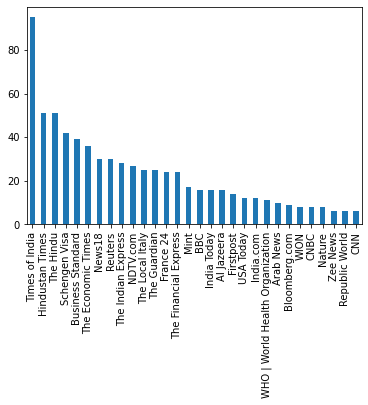

In [ ]:
df['source'].value_counts().nlargest(30).plot(kind='bar')

In [ ]:
df['headlines']=df['headlines'].apply(str)


In [ ]:
!pip install neattext
# Load Text Cleaning Package
import neattext.functions as nfx

In [ ]:
# Cleaning Text
df['clean_text'] = df['headlines'].apply(nfx.remove_hashtags)

# Cleaning Text: Multiple WhiteSpaces
df['clean_text'] = df['clean_text'].apply(nfx.remove_multiple_spaces)
# Cleaning Text : Remove urls
df['clean_text'] = df['clean_text'].apply(nfx.remove_urls)
# Cleaning Text: Punctuations
df['clean_text'] = df['clean_text'].apply(nfx.remove_puncts)
#Remove blank rows if any.
df['clean_text'] .dropna(inplace=True)
# Change all the text to lower case.
df['clean_text']  = [entry.lower() for entry in df['clean_text'] ]
df[['headlines','clean_text']]




,headlines,clean_text
0,Where Australia's first international tourists...,where australias first international tourists ...
1,China hasn't reported COVID-19 death in year w...,china hasnt reported covid19 death in year wit...
2,"Glimmers of hope, but Doomsday Clock stuck at ...",glimmers of hope but doomsday clock stuck at 1...
3,COVID-19 in 2021 — a timeline of the coronavir...,covid19 in 2021 — a timeline of the coronaviru...
4,Explained: All you wanted to know ski jumping ...,explained: all you wanted to know ski jumping ...
...,...,...
1029,"France, Italy impose strict covid-19 vaccine m...",france italy impose strict covid19 vaccine man...
1030,Italy – once overwhelmed by COVID-19 – turns t...,italy – once overwhelmed by covid19 – turns to...
1031,Italy's deleveraging success could help limit ...,italys deleveraging success could help limit m...
1032,Italy bans New Year events as COVID infections...,italy bans new year events as covid infections...


In [ ]:
# Tokenization
df['clean_text']= [word_tokenize(entry) for entry in df['clean_text']]
df['clean_text']


0       [where, australias, first, international, tour...
1       [china, hasnt, reported, covid19, death, in, y...
2       [glimmers, of, hope, but, doomsday, clock, stu...
3       [covid19, in, 2021, —, a, timeline, of, the, c...
4       [explained, :, all, you, wanted, to, know, ski...
                              ...                        
1029    [france, italy, impose, strict, covid19, vacci...
1030    [italy, –, once, overwhelmed, by, covid19, –, ...
1031    [italys, deleveraging, success, could, help, l...
1032    [italy, bans, new, year, events, as, covid, in...
1033    [four, more, italian, regions, become, yellow,...
Name: clean_text, Length: 941, dtype: object

In [ ]:
df['clean_text'].head(3)


0    [where, australias, first, international, tour...
1    [china, hasnt, reported, covid19, death, in, y...
2    [glimmers, of, hope, but, doomsday, clock, stu...
Name: clean_text, dtype: object

In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(words):
  return [word for word in words if  not word in stop_words]
df['clean_text']=df['clean_text'].apply(lambda x: remove_stopwords(x))


def stemming(words):
  ps=PorterStemmer()
  return [ps.stem(word) for word in words]
df['clean_text']=df['clean_text'].apply(lambda x: stemming(x))

def lemmatizing(words):
    lemmatizer =WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]
df['clean_text']=df['clean_text'].apply(lambda x: lemmatizing(x))

def final_text(words):
     return ' '.join(words)
df['clean_text']=df['clean_text'].apply(lambda x:final_text(x))


In [ ]:
df['clean_text'].head()


0    australia first intern tourist come border reo...
1     china hasnt report covid19 death year zero toler
2         glimmer hope doomsday clock stuck 100 second
3           covid19 2021 — timelin coronaviru outbreak
4    explain : want know ski jump beij winter olymp...
Name: clean_text, dtype: object

In [ ]:
def get_sentiment(headlines):
    blob = TextBlob(headlines)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result


In [ ]:
df['sentiment_results'] = df['clean_text'].apply(get_sentiment)
df['sentiment_results']


0       {'polarity': 0.25, 'subjectivity': 0.333333333...
1       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
2       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
4       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
                              ...                        
1029    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
1030    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
1031    {'polarity': 0.3, 'subjectivity': 0.0, 'sentim...
1032    {'polarity': 0.13636363636363635, 'subjectivit...
1033    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
Name: sentiment_results, Length: 941, dtype: object

In [ ]:
df = df.join(pd.json_normalize(df['sentiment_results']))
df.head()


,source,headlines,description,clean_text,sentiment_results,polarity,subjectivity,sentiment
0,ABC,Where Australia's first international tourists...,"Visitors from New Zealand, Singapore, South Ko...",australia first intern tourist come border reo...,"{'polarity': 0.25, 'subjectivity': 0.333333333...",0.25,0.333333,Positive
1,UPI,China hasn't reported COVID-19 death in year w...,"""This year, it's been an absolute nightmare,"" ...",china hasnt report covid19 death year zero toler,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,Neutral
2,The Japan Times,"Glimmers of hope, but Doomsday Clock stuck at ...",... remains at 100 seconds to midnight this ye...,glimmer hope doomsday clock stuck 100 second,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,Neutral
3,Devex,COVID-19 in 2021 — a timeline of the coronavir...,"And for earlier news, visit the timeline for 2...",covid19 2021 — timelin coronaviru outbreak,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,Neutral
4,Firstpost,Explained: All you wanted to know ski jumping ...,Explained: All you wanted to know ski jumping ...,explain : want know ski jump beij winter olymp...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,Neutral


In [ ]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['clean_text'],df['sentiment'],test_size=0.3)


In [ ]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)


In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=None)
Tfidf_vect.fit(df['clean_text'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

print(Tfidf_vect.vocabulary_)


{'australia': 351, 'first': 854, 'intern': 1064, 'tourist': 1903, 'come': 540, 'border': 416, 'reopen': 1600, 'februari': 834, '21': 85, 'china': 505, 'hasnt': 962, 'report': 1604, 'covid19': 596, 'death': 647, 'year': 2054, 'zero': 2061, 'toler': 1892, 'glimmer': 910, 'hope': 995, 'doomsday': 715, 'clock': 522, 'stuck': 1805, '100': 4, 'second': 1683, '2021': 74, 'timelin': 1888, 'coronaviru': 584, 'outbreak': 1389, 'explain': 800, 'want': 2005, 'know': 1118, 'ski': 1744, 'jump': 1109, 'beij': 387, 'winter': 2032, 'olymp': 1365, '2022': 76, 'covid': 595, 'live': 1173, 'updat': 1962, 'record': 1575, 'highest': 974, 'daili': 633, 'number': 1349, 'valneva': 1976, 'inactiv': 1032, 'vaccin': 1973, 'candid': 451, 'shown': 1722, 'new': 1324, 'zealand': 2060, 'open': 1375, 'neighbour': 1320, 'never': 1323, 'felt': 836, 'case': 462, 'plummet': 1460, 'asia': 337, 'scientist': 1671, 'sure': 1825, '22': 88, 'reportedli': 1605, 'take': 1838, 'uganda': 1944, 'airport': 279, 'account': 235, 'loan': 

In [ ]:
print(Train_X_Tfidf)


  (0, 1870)	0.36168551669198684
  (0, 1615)	0.3491953586309861
  (0, 1277)	0.3777881310632147
  (0, 1008)	0.3777881310632147
  (0, 997)	0.29156380626244044
  (0, 596)	0.10813006837139251
  (0, 306)	0.3491953586309861
  (0, 302)	0.28770202372434267
  (0, 272)	0.4004834913309225
  (1, 1592)	0.5094339214754325
  (1, 1530)	0.5842571226454452
  (1, 1179)	0.41972256085222853
  (1, 804)	0.44504943996065577
  (1, 596)	0.15774873118533228
  (2, 1941)	0.3786672674603938
  (2, 1661)	0.2268721091832326
  (2, 1477)	0.3606799222016434
  (2, 801)	0.42200635197686437
  (2, 727)	0.3606799222016434
  (2, 659)	0.4473580912345846
  (2, 596)	0.12078615483233596
  (2, 73)	0.39006693780556423
  (3, 1931)	0.46618500765687937
  (3, 1893)	0.4064827750980095
  (3, 1407)	0.3070503950030597
  :	:
  (655, 1461)	0.2780819347379209
  (655, 1307)	0.3459431430243661
  (655, 1270)	0.2850225235864235
  (655, 877)	0.15072536236888726
  (655, 729)	0.28884833958278655
  (655, 596)	0.10712300373777017
  (655, 462)	0.14166411

In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)


SVM Accuracy Score ->  56.18374558303887


In [ ]:
confusion_matrix(Test_Y,predictions_SVM)


array([[  0,  16,   4,   0],
       [  0, 144,  15,   1],
       [  0,  61,  13,   1],
       [  0,  26,   0,   2]])

In [ ]:
print(classification_report(Test_Y,predictions_SVM))



              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.58      0.90      0.71       160
           2       0.41      0.17      0.24        75
           3       0.50      0.07      0.12        28

    accuracy                           0.56       283
   macro avg       0.37      0.29      0.27       283
weighted avg       0.49      0.56      0.48       283



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
review = """ covid vaccine is available"""
review_vector = Tfidf_vect.transform([review])
print(SVM.predict(review_vector))

[1]
